###### import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
import functions as fn
import halo
import box
import my_rc_params

In [2]:
z = 2
x_bins = np.logspace(-2, 0, 21)
m_bins = np.logspace(10.5, 13.2, 11)
k = np.logspace(-1, 2, 30)
model = 'ModM2E-4P5'
bin_no = 6
slopes = [(0.55, 0.55), (0.8, 0.3), (0.3, 0.8)]
colors = ['b', 'r', 'purple']

In [3]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])
m = np.sqrt(m_bins[:-1]*m_bins[1:])
log_m = np.log10(m)

In [4]:
box_f = box.Box(fn.BOX_PATH, fn.SHOT[z])

In [5]:
df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'box_z{z}.csv')
halo_mass = np.array(df.iloc[:,1])
print(f'Read in {halo_mass.shape[0]} halos')
halo_density = np.array(df.iloc[:, 2:-1]) * 1e9
halo_r200c = np.array(df.iloc[:,-1]) * 1e-3
pos = np.array([0,0,0])
halos = [halo.Halo(pos, r200c) for r200c in halo_r200c]
for i, halo_i in enumerate(halos):
    halo_i.mass = halo_mass[i]
    halo_i.density = halo_density[i,:]

Read in 6218 halos


In [6]:
avg_halos, no_halos = fn.get_mass_avg_density(halos, m_bins)
for i, n in enumerate(no_halos):
    print(f'{n} in 10^{log_m[i]}')

2619.0 in 10^10.635
1452.0 in 10^10.905
710.0 in 10^11.175
402.0 in 10^11.445
192.0 in 10^11.715
90.0 in 10^11.985
35.0 in 10^12.254999999999999
17.0 in 10^12.525
8.0 in 10^12.795
3.0 in 10^13.065


In [7]:
df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'box_z{z}.csv')
p_1h = np.array(df.iloc[:,1])

In [8]:
slope_halos = np.array([])
slope_p_1h = np.array([])
for i, a in enumerate(slopes):
    slope_halos = np.append(slope_halos, copy.deepcopy(avg_halos[bin_no]))
    slope_halos[-1].slope(x, a[0], a[1])
    print(slope_halos[-1].mass)
    model_halos = avg_halos.copy()
    model_halos[bin_no] = slope_halos[-1]

    [halo_i.get_u(x, k) for halo_i in model_halos]

    slope_p_1h = np.append(slope_p_1h, fn.get_power(box_f, model_halos, k, m_bins, z, no_halos))

slope_p_1h = np.reshape(slope_p_1h, [len(slopes), k.shape[0]])

1550133290158.1062
1688752272327.6694
1531173380398.335


/data/ERCblackholes4/eac83/FABLE_S8/functions.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hist = np.array(np.histogram(mass, bins=m_bins))


/tmp/ipykernel_195906/1952859818.py:27: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_195906/1952859818.py:27: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x


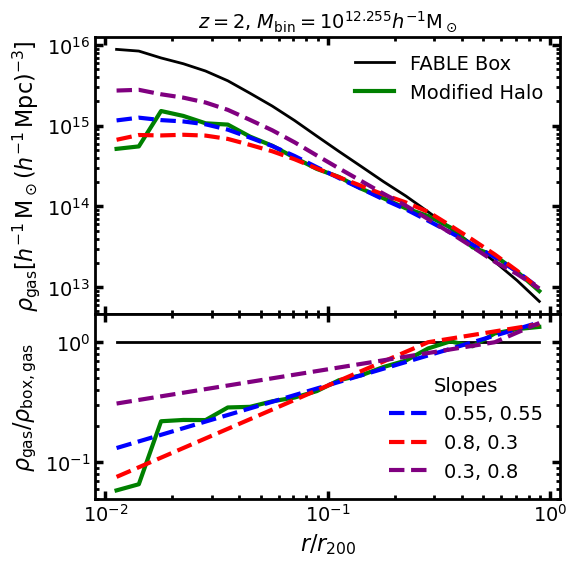

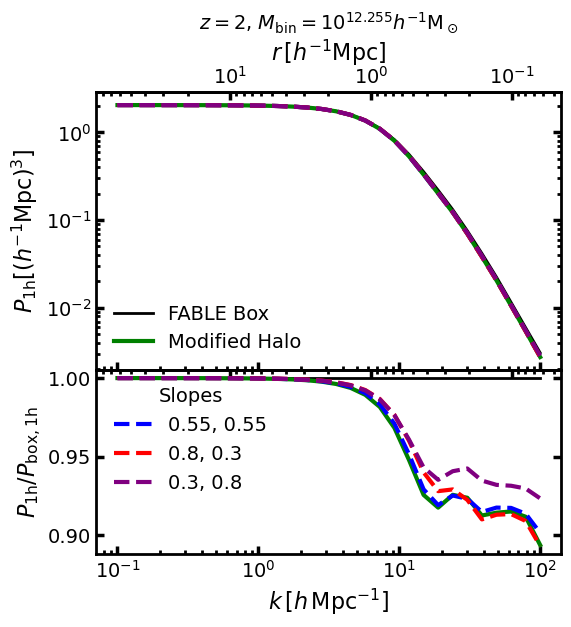

In [9]:
df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'{model}_z{z}.csv')
density_model = np.array(df.iloc[:,2:-1]).T

df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'{model}_unnorm_z{z}.csv')
P_1h_model = np.array(df.iloc[:,1])

fg, ax = plt.subplots(2, gridspec_kw={'height_ratios':[3,2]})
fg.subplots_adjust(hspace=0)
ax[0].loglog()
ax[1].loglog()
ax[1].set_xlabel(r'$r/r_{200}$')
ax[0].set_ylabel(r'$\rho_\mathrm{gas}[h^{-1}\,\mathrm{M}_\odot(h^{-1}\,\mathrm{Mpc})^{-3}]$')
ax[1].set_ylabel(r'$\rho_\mathrm{gas}/\rho_\mathrm{box, gas}$')
ax[0].set_title(f'$z = {z}$, $M_\mathrm{{bin}} = 10^{{{round(log_m[bin_no], 3)}}} h^{{-1}} \mathrm{{M}}_\odot$')

fg2, ax2 = plt.subplots(2, gridspec_kw={'height_ratios':[3,2]})
fg2.subplots_adjust(hspace=0)
ax2[0].loglog()
ax2[1].semilogx()
ax2[1].set_xlabel(r'$k \, [h \,\mathrm{Mpc}^{-1}]$')
ax2[0].set_ylabel(r'$P_\mathrm{1h}[(h^{-1}\mathrm{Mpc})^3]$')
ax2[1].set_ylabel(r'$P_\mathrm{1h}/P_\mathrm{box,1h}$')
ax2[0].set_title(f'$z = {z}$, $M_\mathrm{{bin}} = 10^{{{round(log_m[bin_no], 3)}}} h^{{-1}} \mathrm{{M}}_\odot$')
ax2[0].tick_params(which='both', top=False)
ax2[1].tick_params(which='both', top=False)

f = lambda x: 2*np.pi/x

Ax2 = ax2[0].secondary_xaxis('top', functions=(f,f))
Ax2.set_xlabel(r'$r\, [h^{-1}\mathrm{Mpc}]$')

Ax3 = ax2[1].secondary_xaxis('top', functions=(f,f))
Ax3.set_xticklabels([])

ax[0].plot(x, avg_halos[bin_no].density*1e10, lw=2, c='k', label='FABLE Box')
ax[1].plot(x, avg_halos[bin_no].density/avg_halos[bin_no].density, lw=2, c='k')

ax[0].plot(x, density_model*1e10, lw=3, c=fn.COLORS[model], label='Modified Halo')
ax[1].plot(x, np.divide(density_model.T,(avg_halos[bin_no].density.T)).T, lw=3, c=fn.COLORS[model])

ax2[0].plot(k, p_1h, lw=2, c='k', label='FABLE Box')
ax2[1].plot(k, p_1h/p_1h, lw=2, c='k')

ax2[0].plot(k, P_1h_model, lw=3, c=fn.COLORS[model], label='Modified Halo')
ax2[1].plot(k, P_1h_model/p_1h, lw=3, c=fn.COLORS[model])

for i, halo in enumerate(slope_halos):
    ax[0].plot(x, halo.density*1e10, '--', lw=3, c=colors[i])
    ax[1].plot(x, halo.density/avg_halos[bin_no].density, '--', lw=3, c=colors[i], label=f'{slopes[i][0]}, {slopes[i][1]}')

    ax2[0].plot(k, slope_p_1h[i,:], '--', lw=3, c=colors[i])
    ax2[1].plot(k, slope_p_1h[i,:]/p_1h, '--', lw=3, c=colors[i], label=f'{slopes[i][0]}, {slopes[i][1]}')

ax[0].set_xticklabels([])
ax2[0].set_xticklabels([])

ax[0].legend()
ax[1].legend(title=r'Slopes')

ax2[0].legend()
ax2[1].legend(title=r'Slopes')

fg.savefig(fn.HERE_PATH/'Slope_Density_Plots'/f'bin{bin_no}_z{z}.pdf', bbox_inches='tight')
fg2.savefig(fn.HERE_PATH/'Slope_Power_Plots'/f'bin{bin_no}_z{z}.pdf', bbox_inches='tight')


In [10]:
print(len(model_halos))

10


In [11]:
print(slope_p_1h.shape)

(3, 30)
